In [1]:
import numpy as np  
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')  

print('Matplotlib version: ', mpl.__version__) 

Matplotlib version:  3.9.2


In [2]:
df_can = pd.read_csv('Fashion_Retail_Sales.csv')
print('change')


change


In [3]:
df_can.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash


In [4]:
print(df_can.columns)

Index(['Customer Reference ID', 'Item Purchased', 'Purchase Amount (USD)',
       'Date Purchase', 'Review Rating', 'Payment Method'],
      dtype='object')


In [5]:
x = lambda col: col / 100

In [6]:
df_can.iloc[:, 2] = x(df_can.iloc[:, 2])

In [7]:
df_can.iloc[:,2]

0       46.19
1       24.56
2       21.02
3       31.26
4       30.03
        ...  
3395     0.37
3396     1.76
3397      NaN
3398     1.28
3399     1.15
Name: Purchase Amount (USD), Length: 3400, dtype: float64

In [8]:
df_can.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,46.19,2023-02-05,NaN,Credit Card
1,4115,Tunic,24.56,2023-07-11,2.0,Credit Card
2,4019,Tank Top,21.02,2023-03-23,4.1,Cash
3,4097,Leggings,31.26,2023-03-15,3.2,Cash
4,3997,Wallet,30.03,2022-11-27,4.7,Cash


The first thing I do is inspect the dataset to clean it and spot errors.  There are a lot of records! 3400. I import the file into Google Sheets and check it out! I divide the Purchase Amount column by 100 so that the costs of items is properly documented.  A handbag usually doesn't cost $4,619 unless this is a high-end store, but it doesn't seem like it.

In [10]:
items_amount = df_can.loc[:, ['Item Purchased', 'Purchase Amount (USD)', 'Date Purchase']]
print(items_amount)

     Item Purchased  Purchase Amount (USD) Date Purchase
0           Handbag                  46.19    2023-02-05
1             Tunic                  24.56    2023-07-11
2          Tank Top                  21.02    2023-03-23
3          Leggings                  31.26    2023-03-15
4            Wallet                  30.03    2022-11-27
...             ...                    ...           ...
3395         Shorts                   0.37    2023-07-09
3396       Slippers                   1.76    2023-03-16
3397         Onesie                    NaN    2022-10-03
3398        Sandals                   1.28    2023-01-01
3399       Backpack                   1.15    2023-03-22

[3400 rows x 3 columns]


In [11]:
grouped = df_can.groupby('Item Purchased', as_index=False)['Purchase Amount (USD)'].sum()
print(grouped)

   Item Purchased  Purchase Amount (USD)
0        Backpack                  61.68
1            Belt                 104.84
2          Blazer                  99.85
3          Blouse                 104.72
4           Boots                 118.91
5          Bowtie                  87.05
6        Camisole                  61.36
7        Cardigan                  92.70
8            Coat                  55.54
9           Dress                  41.07
10  Flannel Shirt                  54.26
11     Flip-Flops                 113.09
12         Gloves                 123.30
13        Handbag                 126.68
14            Hat                  57.83
15         Hoodie                  95.79
16         Jacket                  78.99
17          Jeans                 130.68
18       Jumpsuit                  52.54
19         Kimono                  91.30
20       Leggings                  80.87
21        Loafers                 110.05
22         Onesie                  95.49
23       Overall

In [12]:
grouped_df = pd.DataFrame(grouped, columns=['Item Purchased', 'Purchase Amount (USD)'])

In [13]:
grouped_df.head()


,Item Purchased,Purchase Amount (USD)
0,Backpack,61.68
1,Belt,104.84
2,Blazer,99.85
3,Blouse,104.72
4,Boots,118.91


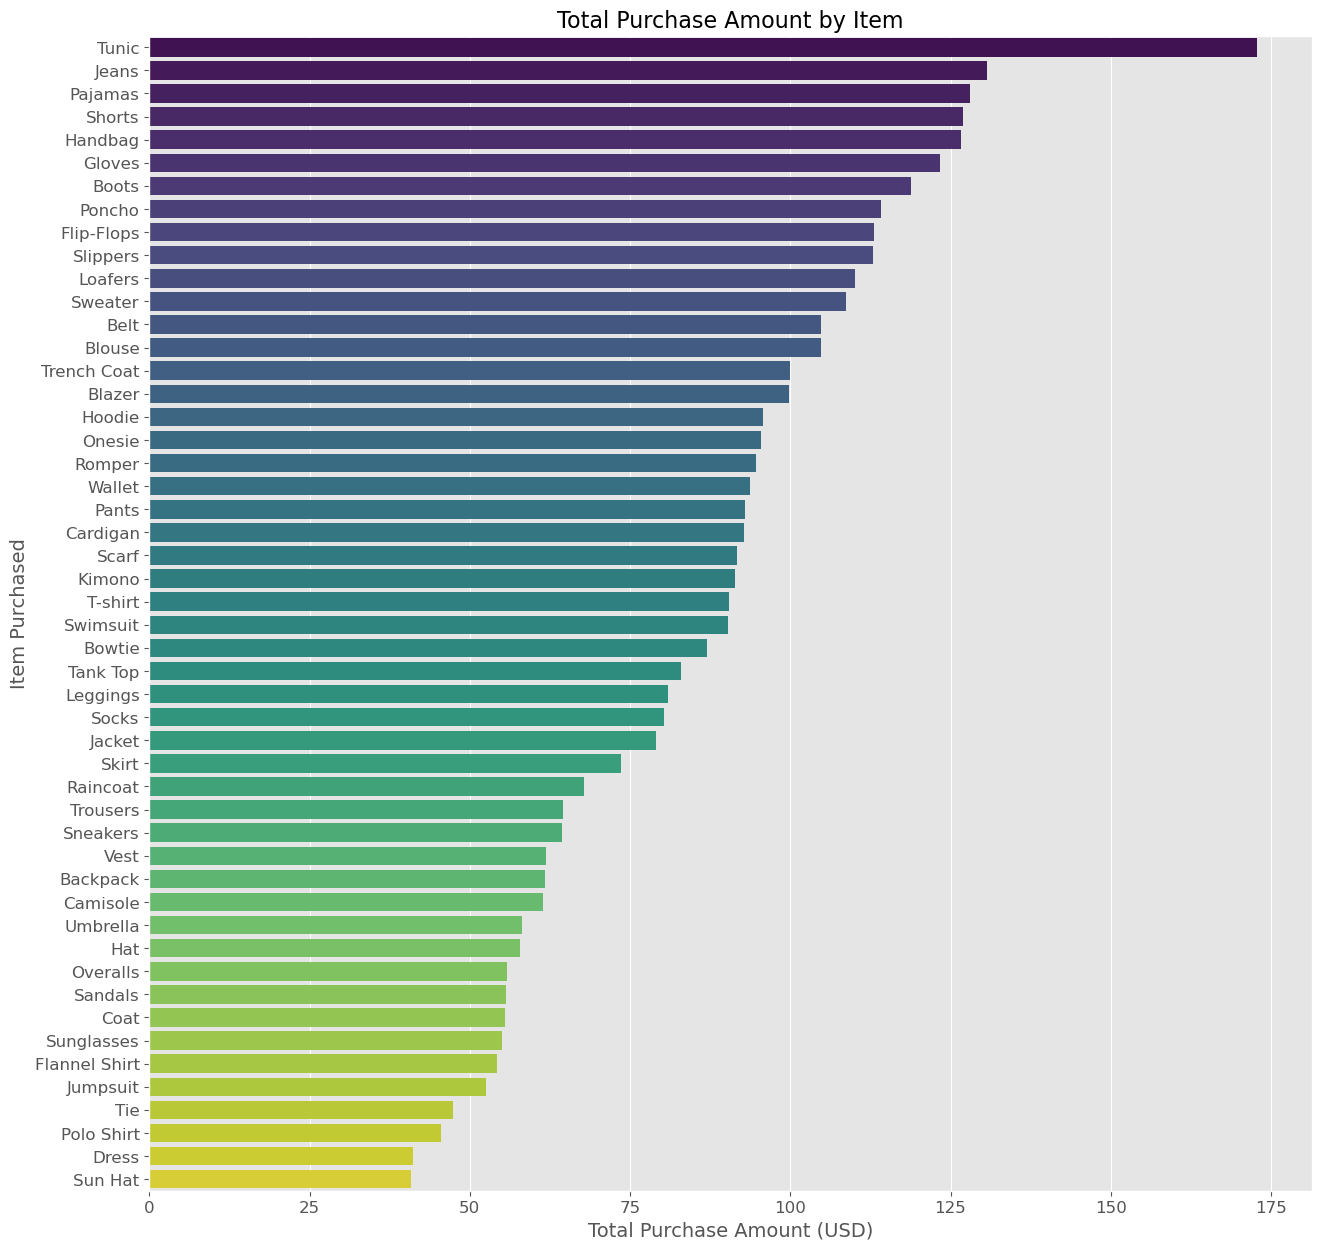

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the first 100 rows of each column (as per your original code)
items = grouped_df['Item Purchased'].head(100)
amount = grouped_df['Purchase Amount (USD)'].head(100)

# Combine these into a new DataFrame
data = pd.DataFrame({'Item Purchased': items, 'Purchase Amount (USD)': amount})

# Group by 'Item Purchased' and sum the 'Purchase Amount (USD)'
item_amount = data.groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()

# Sort the data by amount in descending order to make the plot more informative
item_amount = item_amount.sort_values(by='Purchase Amount (USD)', ascending=False)

font_size_title = 16  # Title font size
font_size_labels = 14  # Axis labels font size
font_size_ticks = 12  # Tick labels font size

# Plot
plt.figure(figsize=(15, 15))
sns.barplot(x='Purchase Amount (USD)', y='Item Purchased', hue='Item Purchased', data=item_amount, palette='viridis', legend='auto')

# Set the title and axis labels with specific font sizes
plt.title('Total Purchase Amount by Item', fontsize=font_size_title)
plt.xlabel('Total Purchase Amount (USD)', fontsize=font_size_labels)
plt.ylabel('Item Purchased', fontsize=font_size_labels)

# Set the font size for tick labels
plt.xticks(fontsize=font_size_ticks)
plt.yticks(fontsize=font_size_ticks)

# Display the plot
plt.show()

Tunics made the store the most money, $175.00 followed by jeans, $130.00.

In [16]:
date_amount = df_can.groupby('Date Purchase', as_index=False)['Purchase Amount (USD)'].sum()
print(date_amount)


    Date Purchase  Purchase Amount (USD)
0      2022-10-02                   8.22
1      2022-10-03                   9.29
2      2022-10-04                  10.71
3      2022-10-05                  11.60
4      2022-10-06                   4.11
..            ...                    ...
360    2023-09-27                   3.38
361    2023-09-28                   8.40
362    2023-09-29                   6.04
363    2023-09-30                  10.08
364    2023-10-01                   4.23

[365 rows x 2 columns]


In [17]:
date_amount_df = pd.DataFrame(date_amount, columns=['Date Purchase', 'Purchase Amount (USD)'])

In [18]:
date_amount_df.head()
print(date_amount_df)

    Date Purchase  Purchase Amount (USD)
0      2022-10-02                   8.22
1      2022-10-03                   9.29
2      2022-10-04                  10.71
3      2022-10-05                  11.60
4      2022-10-06                   4.11
..            ...                    ...
360    2023-09-27                   3.38
361    2023-09-28                   8.40
362    2023-09-29                   6.04
363    2023-09-30                  10.08
364    2023-10-01                   4.23

[365 rows x 2 columns]


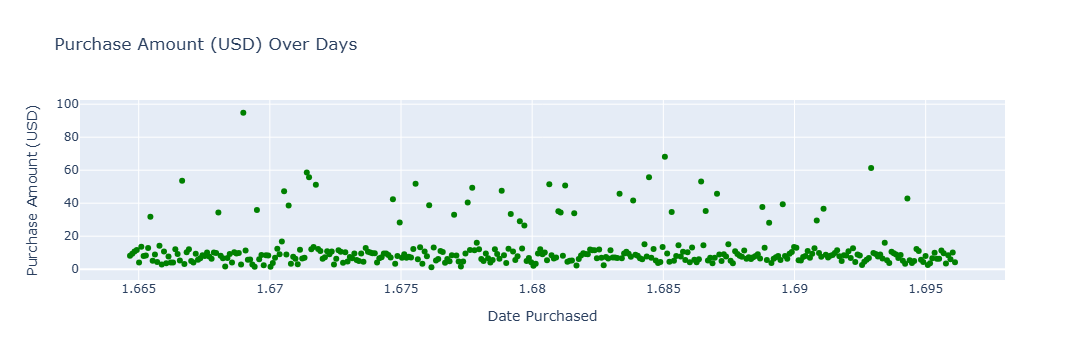

In [47]:
# Assuming 'Date Purchase' is a string or object, convert it to datetime format

date_amount_df['Date Purchase'] = pd.to_datetime(date_amount_df['Date Purchase'])

# Convert the datetime to a Unix timestamp (seconds since epoch)
date_amount_df['Date Purchase'] = date_amount_df['Date Purchase'].astype('int64') / 10**9  # Convert to seconds

dates = date_amount_df['Date Purchase']
amount = date_amount_df['Purchase Amount (USD)']

fig=go.Figure()



fig.add_trace(go.Scatter(x=dates, y=amount, mode='markers', marker=dict(color='green')))

fig.update_layout(title='Purchase Amount (USD) Over Days', xaxis_title='Date Purchased', yaxis_title='Purchase Amount (USD)')

fig.show()


There is no correlation with time and purchase amount.

In [49]:
items = df_can.loc[:,'Item Purchased'].value_counts()
items_df = items.reset_index()

# Rename the columns for better clarity
items_df.columns = ['Item Purchased', 'Count']
print(items_df)

   Item Purchased  Count
0            Belt     90
1           Skirt     88
2          Shorts     87
3           Pants     86
4        Tank Top     82
5         T-shirt     82
6         Pajamas     81
7        Camisole     76
8         Loafers     76
9          Hoodie     75
10         Poncho     73
11          Socks     73
12         Kimono     73
13         Blouse     73
14         Wallet     73
15        Handbag     72
16       Cardigan     72
17           Vest     71
18       Sneakers     71
19         Onesie     71
20       Backpack     71
21         Blazer     71
22       Umbrella     70
23       Raincoat     69
24    Trench Coat     68
25            Hat     68
26     Sunglasses     67
27           Coat     67
28          Scarf     66
29       Swimsuit     66
30          Boots     65
31         Jacket     64
32         Romper     64
33  Flannel Shirt     63
34       Leggings     62
35        Sweater     62
36       Overalls     61
37          Tunic     61
38     Polo Shirt     59


In [22]:
fig=go.Figure()
fig

fig = px.scatter(items_df, x="Item Purchased", y="Count", size="Count",
                 hover_name="Item Purchased", title='How Many of Each Item Was Purchased', size_max=100)
fig.update_layout(
    width=1200,  # Set the width of the figure (in pixels)
    height=800,  # Set the height of the figure (in pixels)
    font={'size': 12},
)
fig.show()

The most belts were purchased at the store with a total count of "90".  The second-most purchased item was skirt with a count of "88".  
The store only sold 61 tunics although they made the most money.  58 jeans were sold.  The lowest selling item was the sun-hat which sold 50 units.

      Review Rating  Date Purchase
0               NaN   1.675555e+09
1               2.0   1.689034e+09
2               4.1   1.679530e+09
3               3.2   1.678838e+09
4               4.7   1.669507e+09
...             ...            ...
3395            2.7   1.688861e+09
3396            2.5   1.678925e+09
3397            2.4   1.664755e+09
3398            1.8   1.672531e+09
3399            1.4   1.679443e+09

[3400 rows x 2 columns]


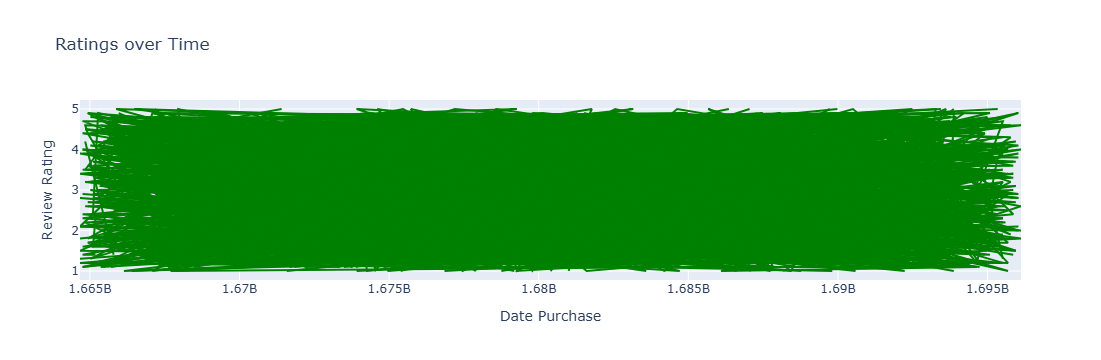

In [51]:
ratings_dates = df_can.loc[:, ['Review Rating', 'Date Purchase']]


ratings_dates['Date Purchase'] = pd.to_datetime(ratings_dates['Date Purchase'])

# Convert the datetime to a Unix timestamp (seconds since epoch)
ratings_dates['Date Purchase'] = ratings_dates['Date Purchase'].astype('int64') / 10**9  # Convert to seconds



print(ratings_dates)

fig = go.Figure()
fig.add_trace(go.Scatter(x=ratings_dates['Date Purchase'], y=ratings_dates['Review Rating'], mode='lines', marker=dict(color='green')))
fig.update_layout(title='Ratings over Time', xaxis_title='Date Purchase', yaxis_title='Review Rating')
# Display the figure
fig.show()

There is no correlation of ratings over time.

From the analysis, we are able to find out that tunics and jeans make the store the most money.  There is no correlation between time and purchase amount or ratings.
Thus, over time the store has not improved revenue or customer satisfaction.  The most popular items sold in the store are belts, skirts and shorts.  